In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from itertools import islice
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("Emails.csv") #load training data
data.columns

Index(['text', 'spam'], dtype='object')

In [3]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [5]:
data['spam'].value_counts(normalize=True)

0    0.761173
1    0.238827
Name: spam, dtype: float64

In [6]:
data.describe(exclude=[np.number])

,text
count,5728
unique,5695
top,Subject: re : get together this coming tuesday...
freq,2


In [7]:
#Spliting the training data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(data["text"], data["spam"], test_size=0.2)

In [8]:
print("Training Data: {}, Validation: {}".format(len(X_train), len(X_valid)))

Training Data: 4582, Validation: 1146


In [9]:
#vectorizing data
data_v = CountVectorizer(max_features=5000, binary=True, stop_words="english")

In [10]:
data_v.fit(X_train)
X_train_v = data_v.transform(X_train)
X_valid_v = data_v.transform(X_valid)

In [11]:
list(islice(data_v.vocabulary_.items(), 20))

[('subject', 4416),
 ('project', 3600),
 ('tracking', 4638),
 ('database', 1309),
 ('access', 299),
 ('hi', 2221),
 ('yes', 4983),
 ('does', 1491),
 ('actually', 333),
 ('group', 2133),
 ('meeting', 2941),
 ('today', 4614),
 ('vince', 4820),
 ('kaminski', 2576),
 ('said', 4020),
 ('wants', 4869),
 ('believe', 701),
 ('stinson', 4369),
 ('gibner', 2079),
 ('working', 4953)]

In [12]:
#logistic regression
model= LogisticRegression(C=0.3)
model.fit(X_train_v, y_train)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
print("Training Acc: {:.4f}".format(model.score(X_train_v, y_train)))
print("Validation Acc: {:.4f}".format(model.score(X_valid_v, y_valid)))

Training Acc: 0.9993
Validation Acc: 0.9939


In [14]:
data_test=pd.read_csv("test.csv")
data_test.head()

,Id,Tweet,following,followers,actions,is_retweet,location
0,8536,Obama Criminal Enterprise Collapsing https://...,10.0,4,1214.0,0,UP THRU DERE!
1,5214,I only learned to dream in sound #love,63.0,55,508.0,0,"Johannesburg, South Africa"
2,7437,Cause I ain't trying to out here thinking you ...,0.0,0,0.0,0,NaN
3,10009,When will they get that it's about #Liberty ? ...,2310.0,2736,32188.0,1,"Shreveport, LA"
4,4672,GM UAW workers to receive profit-sharing up to...,696.0,176,713.0,1,EVERYWHERE


In [15]:
ytest = np.array(y_valid)# confusion matrix and classification report(precision, recall, F1-score)

In [16]:
print(classification_report(ytest, model.predict(X_valid_v)))
print(confusion_matrix(ytest, model.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       862
           1       0.98      0.99      0.99       284

   micro avg       0.99      0.99      0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

[[857   5]
 [  2 282]]


In [17]:
predictions_NN_prob = model.predict(X_valid_v)

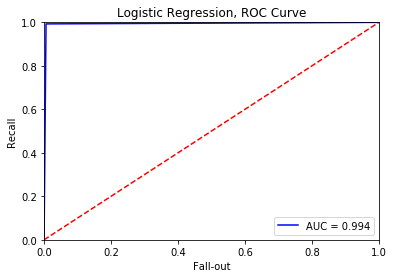

In [18]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob)
roc_auc1 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Logistic Regression, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()


In [19]:
#Gradient Boosted Trees
model_gb = RandomForestClassifier(min_samples_leaf=3, n_estimators=25, n_jobs=-1)
model_gb.fit(X_train_v, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
print("Training Accuracy: {:.3f}".format(model_gb.score(X_train_v, y_train)))
print("Validation Accuracy: {:.3f}".format(model_gb.score(X_valid_v, y_valid)))

Training Accuracy: 0.990
Validation Accuracy: 0.986


In [21]:
print(classification_report(ytest, model_gb.predict(X_valid_v)))
print(confusion_matrix(ytest, model_gb.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       862
           1       0.99      0.95      0.97       284

   micro avg       0.99      0.99      0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146

[[859   3]
 [ 13 271]]


In [22]:
predictions_NN_prob1 = model_gb.predict(X_valid_v)

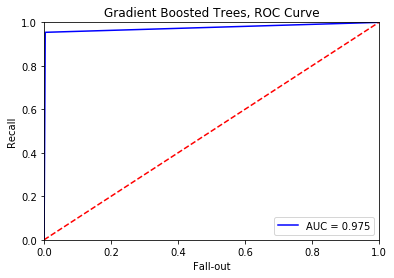

In [23]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob1)
roc_auc2 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Gradient Boosted Trees, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [24]:
#Random Forest
model_rm = RandomForestClassifier(min_samples_leaf=3, n_estimators=25, n_jobs=-1)
model_rm.fit(X_train_v, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
# Training Accuracy
print("Training Accuracy: {:.3f}".format(model_rm.score(X_train_v, y_train)))
print("Validation Accuracy: {:.3f}".format(model_rm.score(X_valid_v, y_valid)))

Training Accuracy: 0.991
Validation Accuracy: 0.988


In [26]:
print(classification_report(ytest, model_rm.predict(X_valid_v)))
print(confusion_matrix(ytest, model_rm.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       862
           1       0.99      0.96      0.98       284

   micro avg       0.99      0.99      0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146

[[858   4]
 [ 10 274]]


In [27]:
predictions_NN_prob2 = model_rm.predict(X_valid_v)

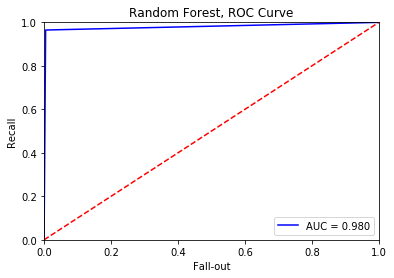

In [28]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob2)
roc_auc3 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Random Forest, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc3)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [29]:
#support vector machine
scaler = MaxAbsScaler()

In [30]:
X_train_scaled = scaler.fit_transform(X_train_v)
X_valid_scaled = scaler.fit_transform(X_valid_v)

In [31]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on validation set: {:.3f}".format(svc.score(X_valid_scaled, y_valid)))

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 1.000
Accuracy on validation set: 0.990


In [32]:
print(classification_report(ytest, svc.predict(X_valid_v)))
print(confusion_matrix(ytest, svc.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       862
           1       0.98      0.98      0.98       284

   micro avg       0.99      0.99      0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

[[856   6]
 [  6 278]]


In [33]:
predictions_NN_prob3 = svc.predict(X_valid_v)

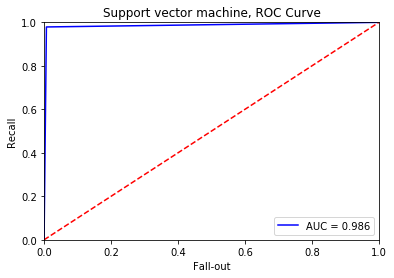

In [34]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob3)
roc_auc4 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Support vector machine, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc4)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [35]:
#k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_v, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train_v, y_train)))
print('Accuracy of K-NN classifier on validation set: {:.2f}'.format(knn.score(X_valid_v, y_valid)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on validation set: 0.91


In [36]:
print(classification_report(ytest, knn.predict(X_valid_v)))
print(confusion_matrix(ytest, knn.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       862
           1       0.80      0.85      0.82       284

   micro avg       0.91      0.91      0.91      1146
   macro avg       0.87      0.89      0.88      1146
weighted avg       0.91      0.91      0.91      1146

[[800  62]
 [ 42 242]]


In [37]:
predictions_NN_prob4 = knn.predict(X_valid_v)

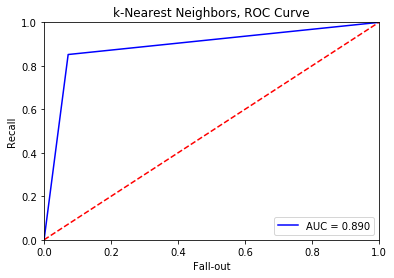

In [38]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob4)
roc_auc5 = auc(false_positive_rate, recall)
plt.figure()
plt.title('k-Nearest Neighbors, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc5)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [39]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

print('')
#k-Nearest Neighbors
printmd("**k-Nearest Neighbors**")
print('Training Acc: {:.2f}'.format(knn.score(X_train_v, y_train)))
print('Validation Acc: {:.2f}'.format(knn.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc5))
print('')
print(classification_report(ytest, knn.predict(X_valid_v)))


print('')
#Logistic Regression
printmd("**Logistic Regression**")
print("Training Acc: {:.4f}".format(model.score(X_train_v, y_train)))
print("Validation Acc: {:.4f}".format(model.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc1))
print('')
print(classification_report(ytest, model.predict(X_valid_v)))


print('')
#Random Forest
printmd("**Random Forest**")
print("Training Acc: {:.3f}".format(model_rm.score(X_train_v, y_train)))
print("Validation Acc: {:.3f}".format(model_rm.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc3))
print('')
print(classification_report(ytest, model_rm.predict(X_valid_v)))

print('')
#Gradient Boosting
printmd("**Gradient Boosting**")
print("Training Acc: {:.3f}".format(model_gb.score(X_train_v, y_train)))
print("Validation Acc: {:.3f}".format(model_gb.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc2))
print('')
print(classification_report(ytest, model_gb.predict(X_valid_v)))

print('')
#Support Vector Machine
printmd("**Support Vector Machine**")
print("Training Acc: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Validation Acc: {:.3f}".format(svc.score(X_valid_scaled, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc4))
print('')
print(classification_report(ytest, svc.predict(X_valid_v)))

**k-Nearest Neighbors**

Training Acc: 0.97
Validation Acc: 0.91
AUC Value: 0.890

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       862
           1       0.80      0.85      0.82       284

   micro avg       0.91      0.91      0.91      1146
   macro avg       0.87      0.89      0.88      1146
weighted avg       0.91      0.91      0.91      1146




**Logistic Regression**

Training Acc: 0.9993
Validation Acc: 0.9939
AUC Value: 0.994

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       862
           1       0.98      0.99      0.99       284

   micro avg       0.99      0.99      0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146




**Random Forest**

Training Acc: 0.991
Validation Acc: 0.988
AUC Value: 0.980

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       862
           1       0.99      0.96      0.98       284

   micro avg       0.99      0.99      0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146




**Gradient Boosting**

Training Acc: 0.990
Validation Acc: 0.986
AUC Value: 0.975

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       862
           1       0.99      0.95      0.97       284

   micro avg       0.99      0.99      0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146




**Support Vector Machine**

Training Acc: 1.000
Validation Acc: 0.990
AUC Value: 0.986

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       862
           1       0.98      0.98      0.98       284

   micro avg       0.99      0.99      0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

